In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\shree\Desktop\Preplaced\ML\dataset\Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
x = df.drop(columns='Salary')

In [5]:
y = df['Salary']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [8]:
# Standardization of data 


from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train=scalar.fit_transform(x_train)

In [9]:
x_test=scalar.fit_transform(x_test)
x_test

array([[ 1.21915163],
       [-0.59032605],
       [ 0.68015828],
       [-0.43632795],
       [-1.24481798],
       [-1.05232035],
       [ 1.48864831],
       [ 0.8726559 ],
       [-0.93682178]])

In [10]:
# import Ridge Regeression from Sklearn
from sklearn.linear_model import Ridge

In [11]:
# Import Grid search CV for Cross validation
from sklearn.model_selection import GridSearchCV

In [12]:
ridge= Ridge()


In [13]:

parameter = {'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}

ridgecv=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)

ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [14]:
ridgecv.best_params_

{'alpha': 1}

In [15]:
ridgecv.best_score_

-35349414.14960085

In [16]:
pred = ridgecv.predict(x_test)

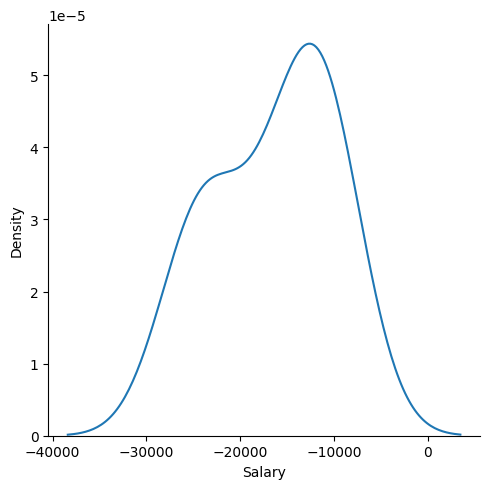

In [17]:
import seaborn as sns

sns.displot(pred-y_test,kind='kde')


In [18]:
from sklearn.metrics import r2_score
score = r2_score(pred,y_test)
score

0.48213822445367127

## Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [20]:
parameter = {'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}

lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)

lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [21]:
lassocv.best_params_,lassocv.best_score_

({'alpha': 1}, -31312771.316532563)

In [22]:
lass_pred=lassocv.predict(x_test)

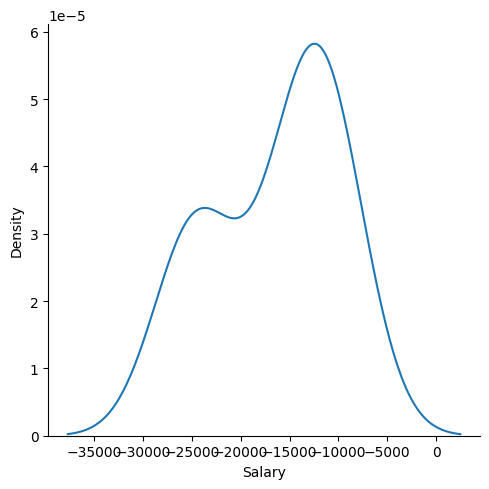

In [23]:
sns.displot(lass_pred-y_test,kind='kde')

In [24]:
from sklearn.metrics import r2_score
score = r2_score(pred,y_test)
score

0.48213822445367127

: 